<a href="https://colab.research.google.com/github/Rkinbag/pick.ai-loan-classification-hackathon/blob/main/pick_ai_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rahul kiroriwal Team(Andrew Paji) Submission**

**Importing Libraries**

In [109]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,auc


**Impoting dataset**

In [111]:
data=pd.read_csv('/content/636dfd50f20b6_loan_dataset__1_.csv')

Droping columns ID and pincode, as they are not correlated with our label

In [112]:
data.drop(data.columns[[0, 1, 2]], axis=1, inplace=True)
  

In [113]:
data

,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,33,4.0,Graduate,8.0,360000,0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...
4995,27,1.0,Post Graduate,3.0,320000,0,no,no,yes,no
4996,28,4.0,Under Graduate,4.0,120000,680000,no,no,yes,no
4997,61,2.0,Post Graduate,39.0,192000,0,no,no,no,no
4998,63,3.0,Graduate,40.0,392000,0,no,no,yes,no


In [114]:
data.describe()


,age,Fam members,T.Experience,Income,Mortgage
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,43.338400,2.396400,20.104600,5.901936e+05,4.519904e+05
std,11.463166,1.147663,11.467954,3.682698e+05,8.137104e+05
min,21.000000,1.000000,-3.000000,6.400000e+04,0.000000e+00
25%,33.000000,1.000000,10.000000,3.120000e+05,0.000000e+00
50%,43.000000,2.000000,20.000000,5.120000e+05,0.000000e+00
75%,53.000000,3.000000,30.000000,7.840000e+05,8.080000e+05
max,65.000000,4.000000,43.000000,1.792000e+06,5.080000e+06


**IMPORTANT**
Total experience has min value -3, which is negative which doesnt make sense so we have to later make some changes

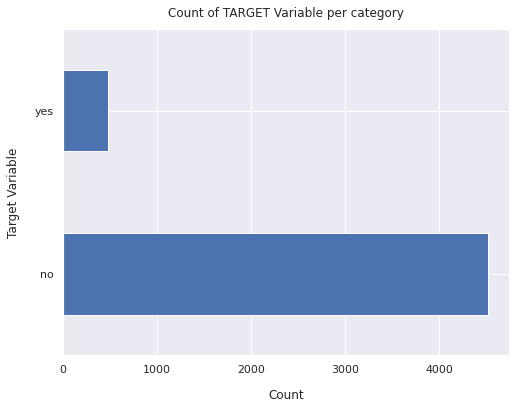

In [115]:
data['Loan'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

**Our Dataset is highly imbalanced as the minority class has very few observation, we have to balance it later**

In [116]:
100*data['Loan'].value_counts()/len(data['Loan'])


no     90.4
yes     9.6
Name: Loan, dtype: float64

As said earlier, distribution of examples across the known classes is biased.
only 9.6% of total observation belong to class "**yes**".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


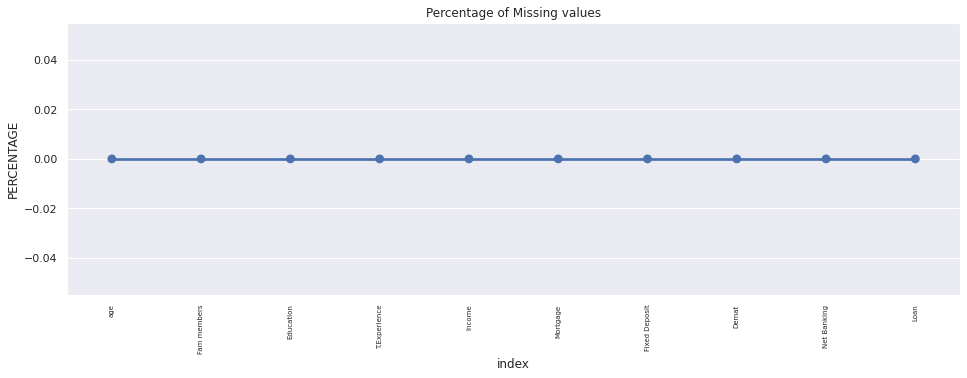

In [117]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**NO NULL VALUES**

In [118]:
data.dtypes

age                int64
Fam members      float64
Education         object
T.Experience     float64
Income             int64
Mortgage           int64
Fixed Deposit     object
Demat             object
Net Banking       object
Loan              object
dtype: object

Visualising categorical data 

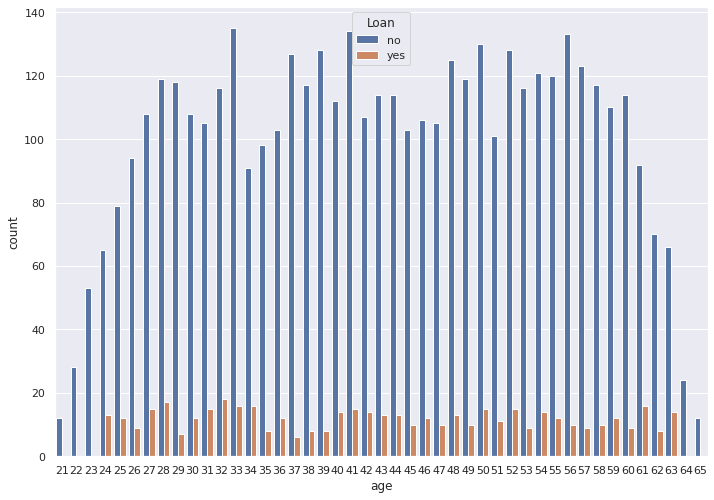

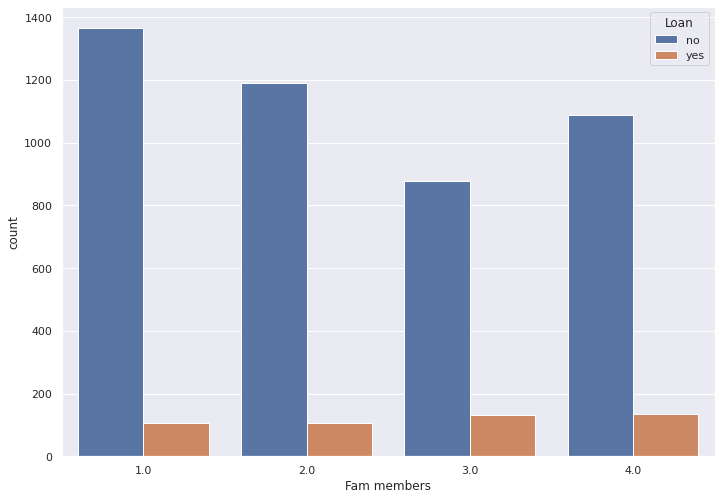

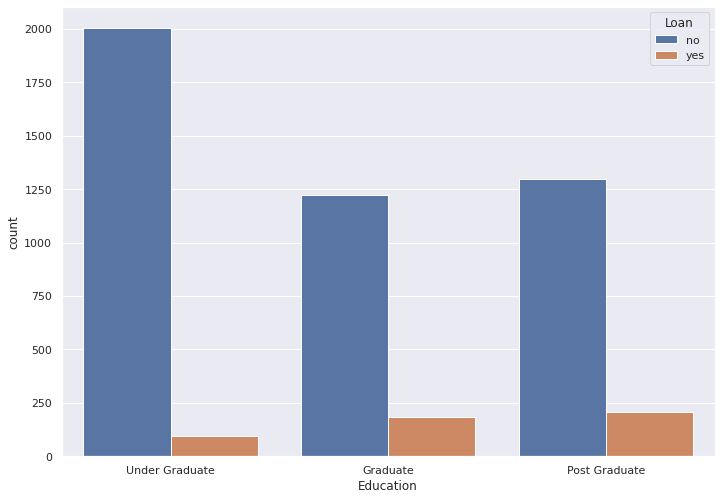

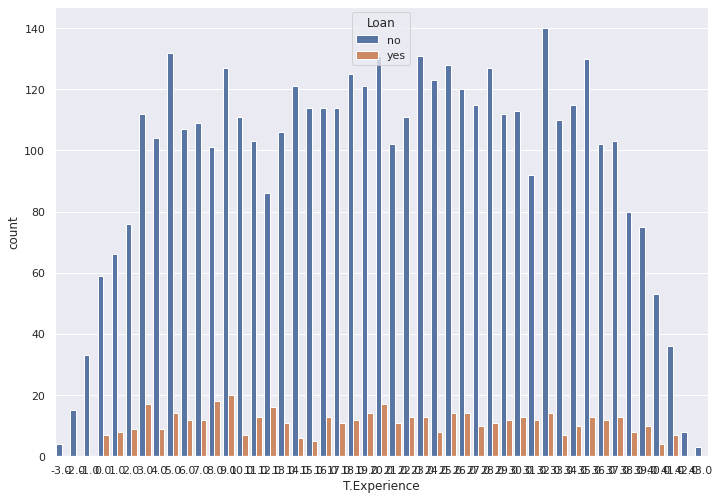

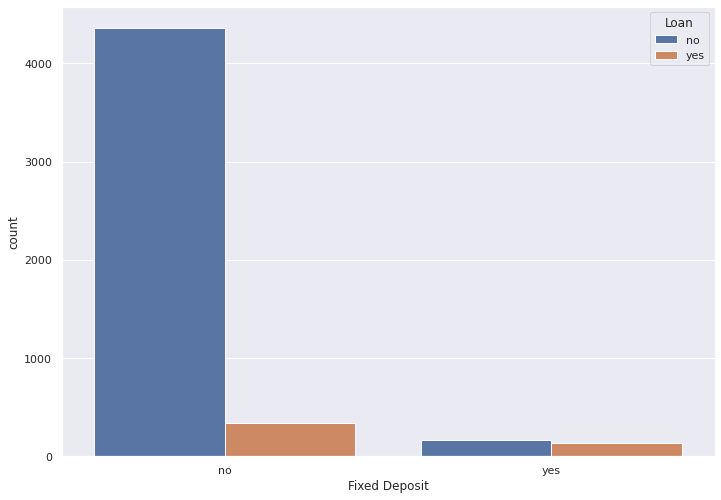

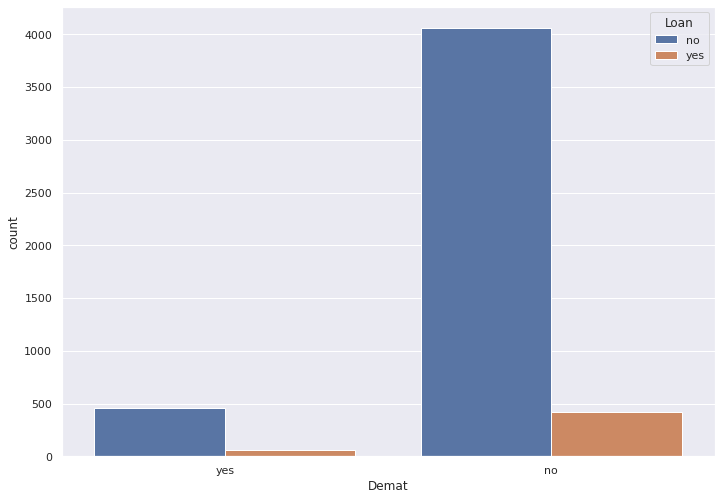

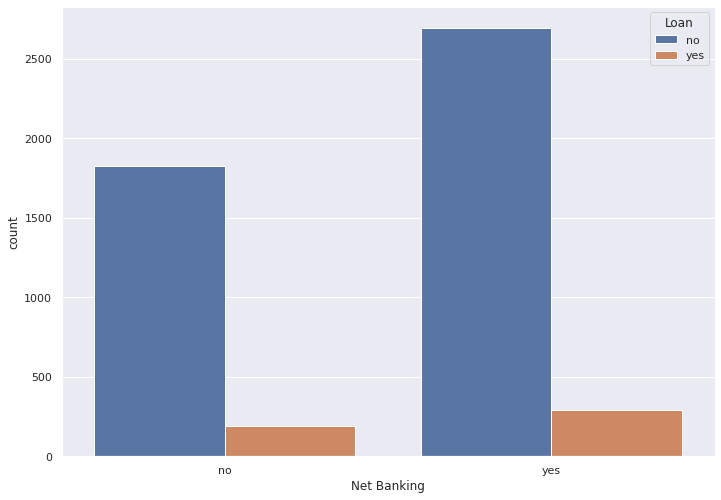

In [119]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i, predictor in enumerate(data.drop(columns=['Loan', 'Income', 'Mortgage'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Loan')

# **Inferences**


**1.**  Plot 1 doesnt show much of a relatinon between our label anf age, though if we look closely we may see that mid 30's are likely to borrow loan, but still its not that significant. 

**2.**   In Plot 2 we can see that prorption of loan borrowers is higher when family memebrs are 3 or higher

**3.** In plot 3 Undergrads are less likely to take loan comparinng to people who had a graduate and post graduate.

**4.** Plot 5 clearly shws that people having fixed depostis are more likely to borrow loan and conversly people who dont have a fixed deposit are less likely to borrown loan

**5.** for other graphs the relation is not significant.



In [120]:
data['Loan'] = np.where(data.Loan == 'yes',1,0)


mapping label values to 0 and 1


**Visualizing continous variables**

Text(0.5, 1.0, 'Total Mortgage by Loan')

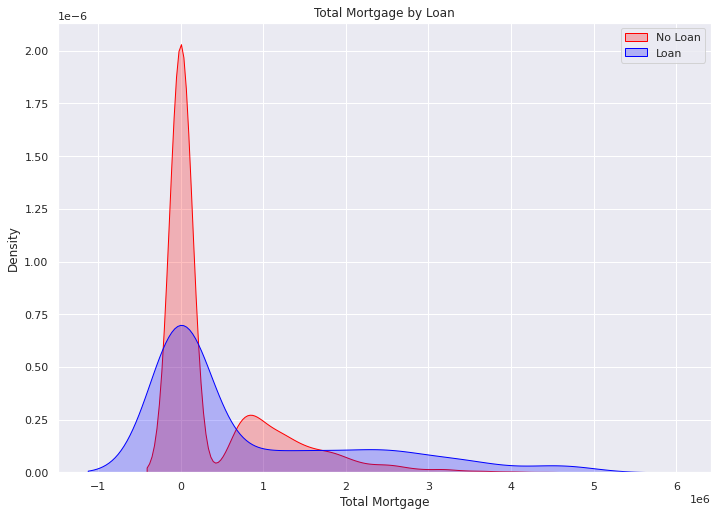

In [121]:
Tot = sns.kdeplot(data.Mortgage[(data["Loan"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data.Mortgage[(data["Loan"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Loan","Loan"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Mortgage')
Tot.set_title('Total Mortgage by Loan')

Its clear that most values are concentrated around 0 as most people in the dataset have no mortgage, to see the relation we have to move more along x axis which tells us that as mortgage reaches >2*10^6 people having loan increases more that people who dont.

Text(0.5, 1.0, 'Total Income by Loan')

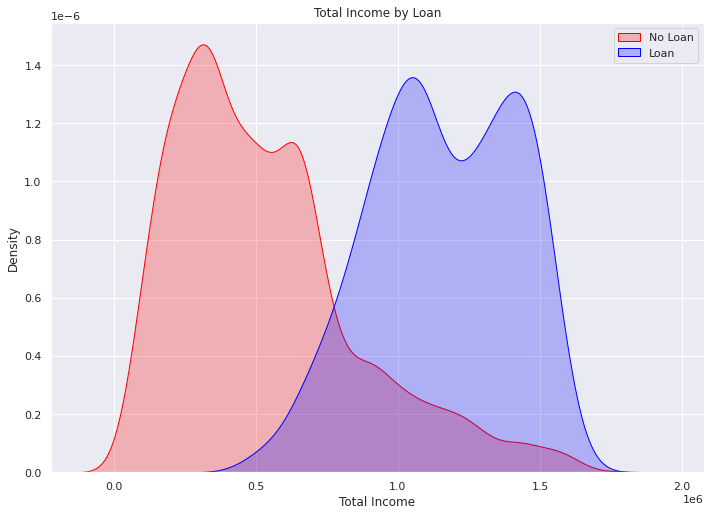

In [122]:
Tot = sns.kdeplot(data.Income[(data["Loan"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data.Income[(data["Loan"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Loan","Loan"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Income')
Tot.set_title('Total Income by Loan')

**This graph strongly shows that people with more income are likely to have loan and vice versa**

Text(0.5, 1.0, 'Total age by Loan')

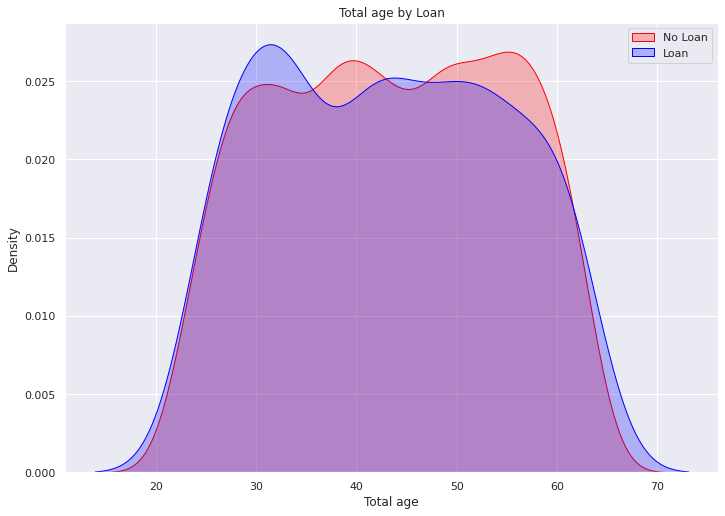

In [123]:
Tot = sns.kdeplot(data.age[(data["Loan"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data.age[(data["Loan"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Loan","Loan"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total age')
Tot.set_title('Total age by Loan')

This graph suggest that there is not relationship between label and age but as we can see peek when age is around 30's suggest that people are mid 30s are more like to borrow loan.

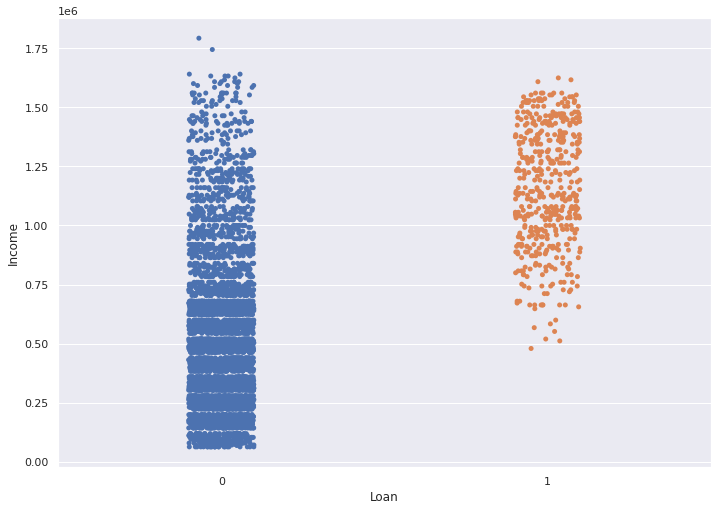

In [124]:
sns.stripplot(x="Loan", y="Income", data=data)
  
plt.show()

stripplot gives similar result as we got from kde plot, we can see for that people which have class label as 1 or loan borrowers have income higher than those who didnt borrow loan, apart from that this also shows that how highly is our data imbalanced.

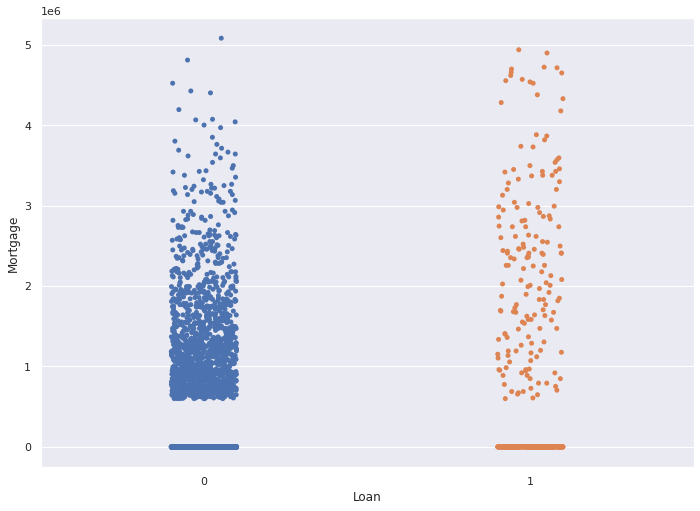

In [125]:
sns.stripplot(y="Mortgage", x="Loan", data=data)
  
plt.show()

Similar results as from KDE plot, as mortagage increase number of obsevation for label 1 or people with loan increases.

In [126]:
data[data.Mortgage>0].count()

age              1538
Fam members      1538
Education        1538
T.Experience     1538
Income           1538
Mortgage         1538
Fixed Deposit    1538
Demat            1538
Net Banking      1538
Loan             1538
dtype: int64

**One hot encoding categorical variables**

In [127]:
data1 = pd.get_dummies(data)
data1.head()

,age,Fam members,T.Experience,Income,Mortgage,Loan,Education_Graduate,Education_Post Graduate,Education_Under Graduate,Fixed Deposit_no,Fixed Deposit_yes,Demat_no,Demat_yes,Net Banking_no,Net Banking_yes
0,23,4.0,1.0,392000,0,0,0,0,1,1,0,0,1,1,0
1,43,3.0,19.0,272000,0,0,0,0,1,1,0,0,1,1,0
2,37,1.0,15.0,88000,0,0,0,0,1,1,0,1,0,1,0
3,33,1.0,9.0,800000,0,0,1,0,0,1,0,1,0,1,0
4,33,4.0,8.0,360000,0,0,1,0,0,1,0,1,0,1,0


In [128]:
data1.columns

Index(['age', 'Fam members', 'T.Experience', 'Income', 'Mortgage', 'Loan',
       'Education_Graduate', 'Education_Post Graduate',
       'Education_Under Graduate', 'Fixed Deposit_no', 'Fixed Deposit_yes',
       'Demat_no', 'Demat_yes', 'Net Banking_no', 'Net Banking_yes'],
      dtype='object')

In [129]:
import matplotlib.pyplot as plt


**Log Transforming numerical variable Income so that it become less skewed and more normal**

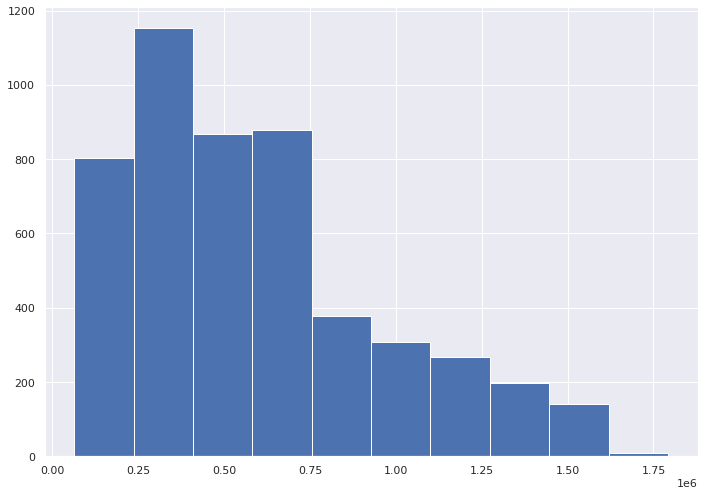

In [130]:
plt.hist(data1['Income'])
plt.show() 


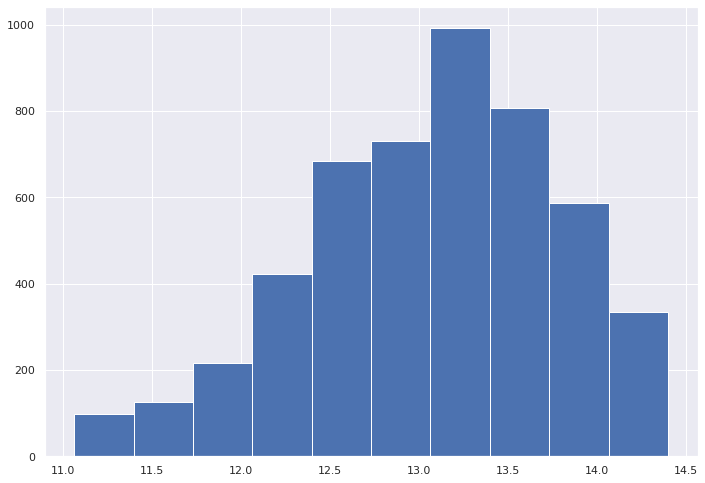

In [131]:
plt.hist(np.log1p(data1['Income']))
plt.show() 

In [132]:
data1['Income']=np.log1p(data1['Income'])

In [133]:
data1

,age,Fam members,T.Experience,Income,Mortgage,Loan,Education_Graduate,Education_Post Graduate,Education_Under Graduate,Fixed Deposit_no,Fixed Deposit_yes,Demat_no,Demat_yes,Net Banking_no,Net Banking_yes
0,23,4.0,1.0,12.879020,0,0,0,0,1,1,0,0,1,1,0
1,43,3.0,19.0,12.513561,0,0,0,0,1,1,0,0,1,1,0
2,37,1.0,15.0,11.385103,0,0,0,0,1,1,0,1,0,1,0
3,33,1.0,9.0,13.592368,0,0,1,0,0,1,0,1,0,1,0
4,33,4.0,8.0,12.793862,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27,1.0,3.0,12.676079,0,0,0,1,0,1,0,1,0,0,1
4996,28,4.0,4.0,11.695255,680000,0,0,0,1,1,0,1,0,0,1
4997,61,2.0,39.0,12.165256,0,0,0,1,0,1,0,1,0,1,0
4998,63,3.0,40.0,12.879020,0,0,1,0,0,1,0,1,0,0,1


Checking for outliers in income column

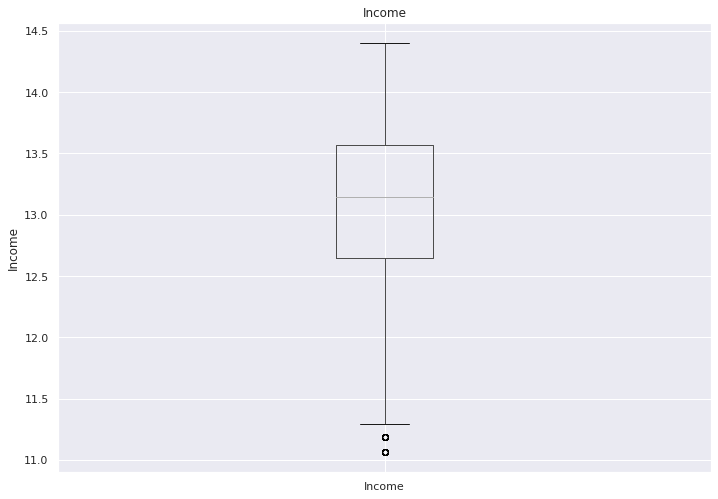

In [134]:
for feature in data1[['Income']]:
    data=data1
    if 0 in data[feature].unique():
        pass
    else:
        
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Outlier Treatment---- Capping the outliers**

In [135]:
for x in ['Income']:
    q75,q25 = np.percentile(data1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = min
    data.loc[data[x] > max,x] = max


In [136]:
from sklearn.preprocessing import MinMaxScaler


In [137]:
scaler = MinMaxScaler()


In [138]:
y1=data1['Loan']
X1=data1.drop('Loan',axis=1)

In [139]:
from sklearn.feature_selection import mutual_info_classif



In [140]:
mutual_info=mutual_info_classif(X1,y1)


**Feature Selection using Mutual Classification**

In [141]:
mutual_data=pd.Series(mutual_info,index=X1.columns)
mutual_data.sort_values(ascending=False)


Income                      0.133961
Fixed Deposit_yes           0.030915
Fixed Deposit_no            0.026553
Mortgage                    0.016340
age                         0.009555
Education_Under Graduate    0.008004
Education_Post Graduate     0.006057
Demat_no                    0.005635
Net Banking_no              0.001767
Education_Graduate          0.000681
Fam members                 0.000000
T.Experience                0.000000
Demat_yes                   0.000000
Net Banking_yes             0.000000
dtype: float64

In [142]:
##data2=data1.drop(['age','Demat_yes','Education_Graduate'],axis=1)

Droping features with 0 information gain

In [143]:
data2=data1.drop(['T.Experience','Demat_yes','Education_Graduate'],axis=1)

In [144]:
from scipy.stats import norm
from scipy.stats import boxcox
from scipy import stats
import statsmodels.api as sm
import pylab as py


**After Outlier Treatment**

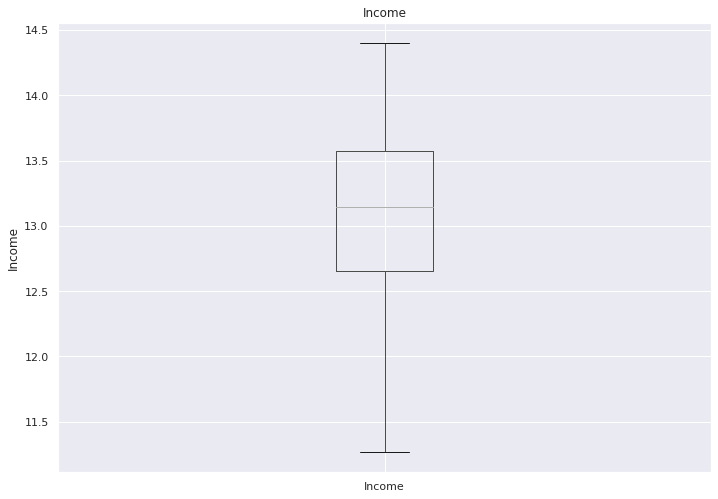

In [145]:
for feature in data2[['Income']]:
    data=data1
    if 0 in data[feature].unique():
        pass
    else:
        
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Scaling Continous Vaariables**

In [146]:
scaled = scaler.fit_transform(data2)


In [147]:
scaled=pd.DataFrame(scaled,columns=data2.columns)

In [148]:
scaled

,age,Fam members,Income,Mortgage,Loan,Education_Post Graduate,Education_Under Graduate,Fixed Deposit_no,Fixed Deposit_yes,Demat_no,Net Banking_no,Net Banking_yes
0,0.045455,1.000000,0.514462,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.500000,0.666667,0.397709,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.363636,0.000000,0.037201,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.272727,0.000000,0.742356,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.272727,1.000000,0.487257,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.000000,0.449629,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4996,0.159091,1.000000,0.136286,0.133858,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4997,0.909091,0.333333,0.286437,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4998,0.954545,0.666667,0.514462,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [149]:
X = scaled.drop('Loan',1) 
y = scaled.Loan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [150]:
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.linear_model import LogisticRegression 
import sklearn.metrics as metrics


In [152]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,y ,test_size =0.2)

In [153]:
model1=LogisticRegression()

In [154]:
model1.fit(x_train1,y_train1)

LogisticRegression()

Without Balancing Data 

In [155]:
pred_cv1 = model1.predict(x_test1)
accuracy_score(y_test1,pred_cv1)

0.958

Poor Recall anf F1 score for minority class

In [156]:
print(classification_report(y_test1, pred_cv1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       0.93      0.60      0.73        95

    accuracy                           0.96      1000
   macro avg       0.95      0.80      0.85      1000
weighted avg       0.96      0.96      0.95      1000



# **Handling imbalance data with smoteen**

In [157]:
from imblearn.combine import SMOTEENN


In [158]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [159]:
X_resampled.shape


(8585, 11)

**After balancing Count of both classes**

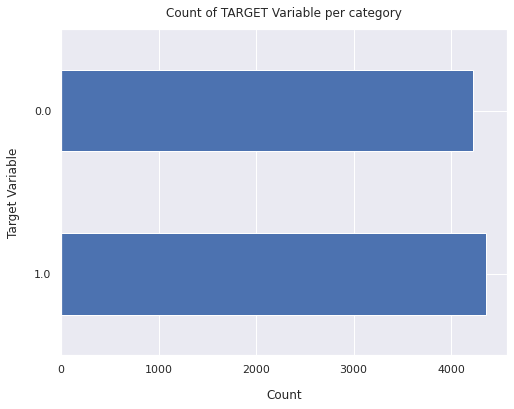

In [160]:
y_resampled.value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

Spliting Data for model training

In [161]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size =0.2)

# **Logistic Regression**

In [162]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [163]:
pred_cv = model.predict(x_test)


In [164]:
accuracy_score(y_test,pred_cv)


0.9470005824111823

In [165]:
print(classification_report(y_test, pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       831
           1       0.94      0.96      0.95       886

    accuracy                           0.95      1717
   macro avg       0.95      0.95      0.95      1717
weighted avg       0.95      0.95      0.95      1717



In [166]:
scaled.to_csv('tee.csv')

# **Light Gradient Boosting Machine Classifier**

In [167]:
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [168]:
model1 = LGBMClassifier()
model1.fit(x_train, y_train)

LGBMClassifier()

In [169]:
pred_cv = model1.predict(x_test)


In [170]:
accuracy_score(y_test,pred_cv)


0.9970879440885265

In [171]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [172]:
print(classification_report(y_test, pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       831
           1       1.00      1.00      1.00       886

    accuracy                           1.00      1717
   macro avg       1.00      1.00      1.00      1717
weighted avg       1.00      1.00      1.00      1717



In [173]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, pred_cv)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 0.9971


In [174]:
from sklearn import metrics

**ROC AUC Curve**

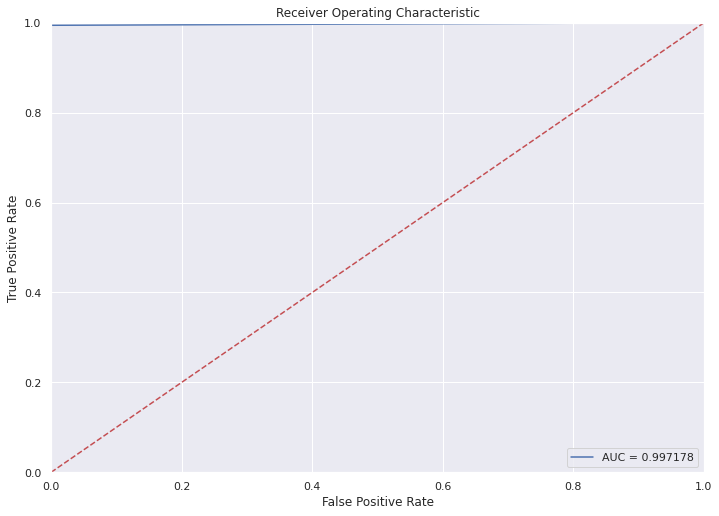

In [181]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_cv)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [182]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])



**Confusion Matrix**

True Negatives:  831
False Positives:  0
False Negatives:  5
True Positives:  881


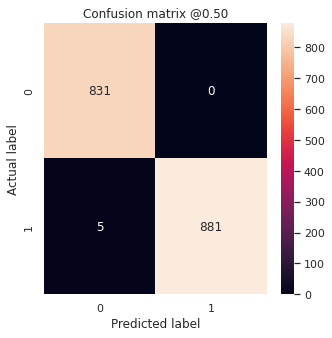

In [183]:
plot_cm(y_test, pred_cv)


In [184]:
import statistics


In [185]:
cv = StratifiedKFold(n_splits=5,shuffle=False)


# **ROC Curve with Cross-Validation**

**This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


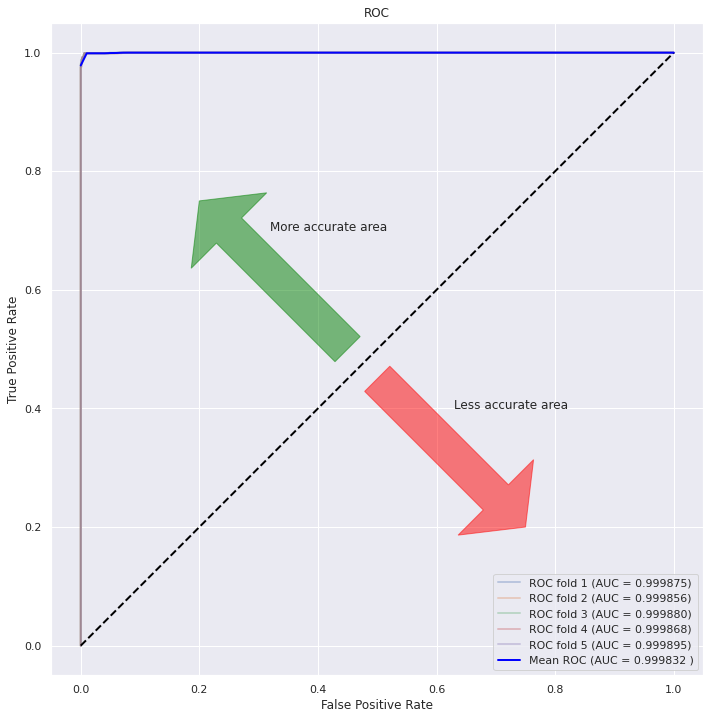

In [186]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_resampled,y_resampled):
    prediction = model1.fit(x_train,y_train).predict_proba(x_test)
    fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.6f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.6f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

— The Relationship Between Precision-Recall and ROC Curves, 2006. 

# **PR Curve**

gbm: f1=0.994 auc=1.000


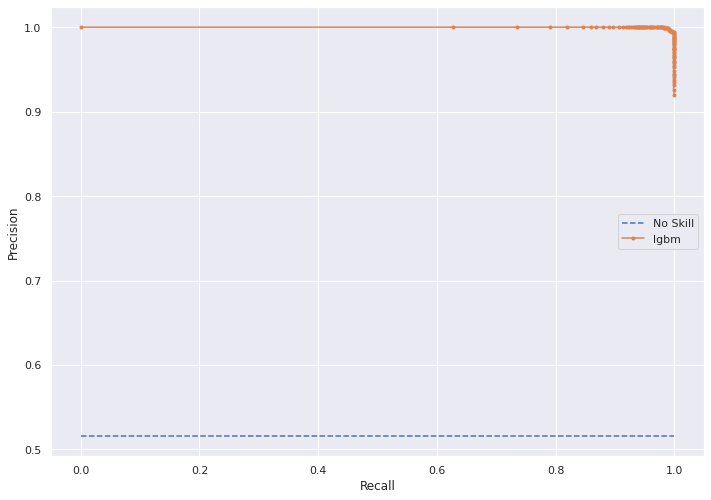

In [187]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset

model1.fit(x_train, y_train)
# predict probabilities
lr_probs = model1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model1.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('gbm: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='lgbm')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()